# Neural Network Implementation from Scratch


In [1]:
# Import required Libriary 
import pandas as pd
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Read csv
df = pd.read_csv(r"C:\Users\e207222\Documents\My_projects\Python_OOPS\Insurance.csv")
df.head(2)

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               28 non-null     int64
 1   affordibility     28 non-null     int64
 2   bought_insurance  28 non-null     int64
dtypes: int64(3)
memory usage: 800.0 bytes


In [4]:
X= df.drop('bought_insurance',axis=1)
y = df['bought_insurance']

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [6]:
X_train.shape

(22, 2)

In [7]:
X_test.shape

(6, 2)

In [8]:
#Scaling age which similar to feature affordibility
X_train['age'] = (X_train['age']- X_train['age'].min())/(X_train['age'].max()-X_train['age'].min())
X_test['age'] = (X_test['age']- X_test['age'].min())/(X_test['age'].max()-X_test['age'].min())

In [9]:
X_train.head(3)

,age,affordibility
11,0.227273,1
0,0.090909,1
19,0.000000,1


In [10]:
y_train.head(3)

11    0
0     0
19    0
Name: bought_insurance, dtype: int64

In [11]:
y_train.value_counts()

0    11
1    11
Name: bought_insurance, dtype: int64

In [12]:
def sigmoid_numpy(X):
    return 1/(1+np.exp(-X))

In [13]:
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

In [29]:
def gradient_descent_new(age, affordability, y_true, epochs):
    w1 = w2 = 1
    bias = 0
    rate = 0.5
    n = len(age)
    for i in range(epochs):
        weighted_sum = w1 * age + w2 * affordability + bias
        y_predicted = sigmoid(weighted_sum)
        loss = logloss(y_true, y_predicted)

        w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
        w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) 

        bias_d = np.mean(y_predicted-y_true)
        w1 = w1 - rate * w1d
        w2 = w2 - rate * w2d
        bias = bias - rate * bias_d

        print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

        #if loss<=loss_thresold:
        #    break

    return w1, w2, bias

In [30]:
gradient_descent_new(age = X_train['age'],affordability = X_train['affordibility'],y_true = y_train,epochs=1000)

Epoch:0, w1:1.0103460540414844, w2:0.9503244315102893, bias:-0.08157049164179445, loss:0.5950078706971451
Epoch:1, w1:1.024766780617374, w2:0.9074382002709146, bias:-0.1537537554209962, loss:0.5776007508686737
Epoch:2, w1:1.042866524326065, w2:0.8707654827165715, bias:-0.21745709369334926, loss:0.5639042451625387
Epoch:3, w1:1.0642005394316354, w2:0.8396398189886217, bias:-0.2736554425544691, loss:0.5530620083511347
Epoch:4, w1:1.0883108842716767, w2:0.8133640785742979, bias:-0.32332380871948785, loss:0.5443540432720609
Epoch:5, w1:1.114754004651599, w2:0.7912566007841202, bias:-0.36738792684724453, loss:0.5372071021783009
Epoch:6, w1:1.1431190699297673, w2:0.772682018431378, bias:-0.4066934301412761, loss:0.5311841605773515
Epoch:7, w1:1.173038105972566, w2:0.7570685633778259, bias:-0.4419905797342285, loss:0.5259632650905904
Epoch:8, w1:1.2041898320782047, w2:0.7439150389716783, bias:-0.4739304349949295, loss:0.5213134873776942
Epoch:9, w1:1.2362991962623586, w2:0.732790746894919, bi

Epoch:150, w1:4.39084061447605, w2:0.36115214568148957, bias:-1.8339722135774577, loss:0.3286584180910897
Epoch:151, w1:4.404510709631624, w2:0.3587984309687013, bias:-1.8384536341245958, loss:0.32823002071832275
Epoch:152, w1:4.41810978860398, w2:0.35644575825207614, bias:-1.8429014718762, loss:0.3278061559545533
Epoch:153, w1:4.431638494794917, w2:0.35409414112418647, bias:-1.8473160727145022, loss:0.32738675740260703
Epoch:154, w1:4.445097463593743, w2:0.3517435931626276, bias:-1.8516977779791697, loss:0.3269717598768309
Epoch:155, w1:4.458487322499657, w2:0.3493941279280101, bias:-1.8560469245423106, loss:0.32656109937711064
Epoch:156, w1:4.471808691242015, w2:0.34704575896197243, bias:-1.860363844881974, loss:0.3261547130635182
Epoch:157, w1:4.48506218189852, w2:0.3446984997852159, bias:-1.8646488671541808, loss:0.3257525392315738
Epoch:158, w1:4.498248399011378, w2:0.34235236389556367, bias:-1.8689023152635214, loss:0.3253545172881081
Epoch:159, w1:4.511367939701442, w2:0.3400073

Epoch:236, w1:5.3591775293584965, w2:0.16384447223901819, bias:-2.124434982590933, loss:0.30348210342216425
Epoch:237, w1:5.36847298283798, w2:0.1616253001252015, bias:-2.126947149265529, loss:0.3032856847067343
Epoch:238, w1:5.3777325678251495, w2:0.15940814294891714, bias:-2.129444255866177, loss:0.3030907782840733
Epoch:239, w1:5.386956531724752, w2:0.15719300874745776, bias:-2.131926429436071, loss:0.3028973675916472
Epoch:240, w1:5.3961451195268255, w2:0.15497990547574764, bias:-2.1343937957097388, loss:0.30270543629912267
Epoch:241, w1:5.40529857383667, w2:0.1527688410064731, bias:-2.136846479129443, loss:0.3025149683044621
Epoch:242, w1:5.4144171349043635, w2:0.15055982313022293, bias:-2.139284602861336, loss:0.3023259477300951
Epoch:243, w1:5.423501040653849, w2:0.14835285955563884, bias:-2.1417082888113663, loss:0.30213835891916246
Epoch:244, w1:5.4325505267115854, w2:0.14614795790957527, bias:-2.144117657640945, loss:0.3019521864318345
Epoch:245, w1:5.441565826434777, w2:0.14

Epoch:329, w1:6.096541210301018, w2:-0.033103869770528364, bias:-2.307001312145945, loss:0.2900558667076503
Epoch:330, w1:6.103314960386396, w2:-0.03511122289560495, bias:-2.3085241964155143, loss:0.2899509388196151
Epoch:331, w1:6.11006841607862, w2:-0.037116130759729374, bias:-2.3100398153291333, loss:0.2898466276535104
Epoch:332, w1:6.116801687066572, w2:-0.0391185917112187, bias:-2.3115482215334784, loss:0.28974292802541746
Epoch:333, w1:6.1235148821867424, w2:-0.04111860414967173, bias:-2.3130494672171067, loss:0.28963983480829697
Epoch:334, w1:6.130208109431725, w2:-0.04311616652559233, bias:-2.3145436041150953, loss:0.2895373429312278
Epoch:335, w1:6.136881475958622, w2:-0.04511127734001396, bias:-2.316030683513627, loss:0.2894354473786561
Epoch:336, w1:6.143535088097345, w2:-0.047103935144125086, bias:-2.317510756254519, loss:0.28933414318965994
Epoch:337, w1:6.150169051358817, w2:-0.0490941385388959, bias:-2.3189838727397007, loss:0.2892334254572199
Epoch:338, w1:6.15678347044

Epoch:408, w1:6.576700528913152, w2:-0.1840892176793689, bias:-2.408490671553178, loss:0.28332783307813086
Epoch:409, w1:6.582152369876958, w2:-0.18590182484952528, bias:-2.409571477456659, loss:0.2832592280442525
Epoch:410, w1:6.587590500766988, w2:-0.18771198648198756, bias:-2.4106480639207577, loss:0.2831909592971329
Epoch:411, w1:6.593014983748566, w2:-0.18951970392429057, bias:-2.411720458254497, loss:0.2831230244979599
Epoch:412, w1:6.5984258805768, w2:-0.19132497854990557, bias:-2.412788687551459, loss:0.28305542132930944
Epoch:413, w1:6.603823252600069, w2:-0.19312781175798308, bias:-2.4138527786917163, loss:0.2829881474949034
Epoch:414, w1:6.609207160763485, w2:-0.19492820497309732, bias:-2.4149127583437435, loss:0.2829212007193719
Epoch:415, w1:6.6145776656123045, w2:-0.19672615964499235, bias:-2.4159686529663063, loss:0.28285457874801795
Epoch:416, w1:6.6199348272953165, w2:-0.1985216772483297, bias:-2.4170204888103344, loss:0.2827882793465853
Epoch:417, w1:6.625278705568188

Epoch:496, w1:7.009965171184868, w2:-0.33443624774435976, bias:-2.4900102101689296, loss:0.2783631346386274
Epoch:497, w1:7.014410407528552, w2:-0.33604111256421826, bias:-2.490804440269523, loss:0.27831705761024483
Epoch:498, w1:7.018846147228352, w2:-0.3376437250340421, bias:-2.491596202925421, loss:0.27827117237477156
Epoch:499, w1:7.0232724265751765, w2:-0.33924408796316285, bias:-2.4923855121529335, loss:0.2782254778156309
Epoch:500, w1:7.027689281655541, w2:-0.3408422041697667, bias:-2.493172381867017, loss:0.27817997282478896
Epoch:501, w1:7.032096748353061, w2:-0.34243807648075714, bias:-2.4939568258821008, loss:0.27813465630267403
Epoch:502, w1:7.036494862349934, w2:-0.34403170773161856, bias:-2.4947388579129055, loss:0.27808952715809515
Epoch:503, w1:7.040883659128403, w2:-0.3456231007662811, bias:-2.4955184915752566, loss:0.27804458430816337
Epoch:504, w1:7.0452631739722165, w2:-0.3472122584369862, bias:-2.4962957403868877, loss:0.27799982667821305
Epoch:505, w1:7.0496334419

Epoch:581, w1:7.357121642220121, w2:-0.46310021009992325, bias:-2.549914347725134, loss:0.27503598525907763
Epoch:582, w1:7.3608716766398805, w2:-0.4645242836838619, bias:-2.55054033065992, loss:0.2750029293169065
Epoch:583, w1:7.364614694019255, w2:-0.46594636374552784, bias:-2.5511647443811563, loss:0.2749699942623465
Epoch:584, w1:7.368350717531171, w2:-0.467366453451309, bias:-2.5517875966325323, loss:0.2749371794861041
Epoch:585, w1:7.372079770234663, w2:-0.46878455596805935, bias:-2.5524088951060118, loss:0.27490448438290094
Epoch:586, w1:7.375801875075603, w2:-0.4702006744630334, bias:-2.5530286474422255, loss:0.2748719083514409
Epoch:587, w1:7.379517054887429, w2:-0.4716148121038214, bias:-2.553646861230864, loss:0.2748394507943772
Epoch:588, w1:7.383225332391863, w2:-0.47302697205828487, bias:-2.554263544011065, loss:0.27480711111828027
Epoch:589, w1:7.38692673019963, w2:-0.4744371574944929, bias:-2.5548787032717977, loss:0.2747748887336056
Epoch:590, w1:7.390621270811167, w2:

Epoch:661, w1:7.636690337241197, w2:-0.5709860529514796, bias:-2.595597263764093, loss:0.27272909984965926
Epoch:662, w1:7.6399439118972525, w2:-0.5722605989618228, bias:-2.5961184829333352, loss:0.27270407411134673
Epoch:663, w1:7.643192015654113, w2:-0.573533401739795, bias:-2.5966386167841473, loss:0.27267913093288176
Epoch:664, w1:7.646434664487665, w2:-0.5748044643269956, bias:-2.597157669939786, loss:0.2726542699437722
Epoch:665, w1:7.649671874303948, w2:-0.5760737897619009, bias:-2.5976756469950097, loss:0.27262949077568693
Epoch:666, w1:7.6529036609395495, w2:-0.5773413810798363, bias:-2.598192552516286, loss:0.2726047930624395
Epoch:667, w1:7.656130040162011, w2:-0.5786072413129495, bias:-2.598708391041995, loss:0.2725801764399723
Epoch:668, w1:7.659351027670223, w2:-0.5798713734901835, bias:-2.5992231670826316, loss:0.27255564054634196
Epoch:669, w1:7.662566639094821, w2:-0.5811337806372501, bias:-2.5997368851210068, loss:0.2725311850217032
Epoch:670, w1:7.665776889998575, w2

Epoch:749, w1:7.903666931392832, w2:-0.6767985918882236, bias:-2.6377581013470834, loss:0.2708067078539982
Epoch:750, w1:7.906493397164533, w2:-0.6779309819793969, bias:-2.6381988063076496, loss:0.27078773436621467
Epoch:751, w1:7.909315568927061, w2:-0.6790618822312757, bias:-2.6386387429914815, loss:0.2707688176572764
Epoch:752, w1:7.912133457787116, w2:-0.6801912953374019, bias:-2.639077914151744, loss:0.2707499574991074
Epoch:753, w1:7.914947074808258, w2:-0.6813192239868286, bias:-2.639516322526266, loss:0.2707311536648145
Epoch:754, w1:7.917756431011138, w2:-0.6824456708641142, bias:-2.6399539708376456, loss:0.27071240592867934
Epoch:755, w1:7.9205615373737155, w2:-0.6835706386493163, bias:-2.640390861793352, loss:0.2706937140661509
Epoch:756, w1:7.9233624048314795, w2:-0.6846941300179863, bias:-2.64082699808583, loss:0.27067507785383776
Epoch:757, w1:7.926159044277667, w2:-0.6858161476411633, bias:-2.6412623823926022, loss:0.2706564970695014
Epoch:758, w1:7.928951466563481, w2:-

Epoch:836, w1:8.13459438342144, w2:-0.7700184024520734, bias:-2.6734864895580253, loss:0.26934662736818504
Epoch:837, w1:8.137084697122987, w2:-0.7710307691463548, bias:-2.673869234732249, loss:0.2693318507628025
Epoch:838, w1:8.139571542552297, w2:-0.7720418632177543, bias:-2.674251403308545, loss:0.2693171148254075
Epoch:839, w1:8.142054927767584, w2:-0.77305168696089, bias:-2.6746329970254292, loss:0.2693024194075857
Epoch:840, w1:8.144534860798968, w2:-0.7740602426658332, bias:-2.675014017612792, loss:0.2692877643616179
Epoch:841, w1:8.1470113496486, w2:-0.7750675326181117, bias:-2.675394466791954, loss:0.26927314954047554
Epoch:842, w1:8.1494844022908, w2:-0.7760735590987132, bias:-2.6757743462757184, loss:0.26925857479781684
Epoch:843, w1:8.15195402667218, w2:-0.7770783243840889, bias:-2.676153657768428, loss:0.2692440399879828
Epoch:844, w1:8.154420230711777, w2:-0.7780818307461568, bias:-2.676532402966016, loss:0.2692295449659933
Epoch:845, w1:8.156883022301177, w2:-0.779084080

Epoch:922, w1:8.336854078401473, w2:-0.8526558219962903, bias:-2.704456455365558, loss:0.26821063960536273
Epoch:923, w1:8.339072952495512, w2:-0.853566673758403, bias:-2.7047951889112283, loss:0.26819888144140047
Epoch:924, w1:8.3412889606099, w2:-0.8544764340770514, bias:-2.7051334687259305, loss:0.2681871533622966
Epoch:925, w1:8.34350210879816, w2:-0.8553851048734447, bias:-2.705471295972526, loss:0.26817545526713976
Epoch:926, w1:8.345712403094684, w2:-0.8562926880647079, bias:-2.7058086718087986, loss:0.26816378705545
Epoch:927, w1:8.347919849514806, w2:-0.8571991855638894, bias:-2.7061455973874855, loss:0.26815214862717707
Epoch:928, w1:8.350124454054896, w2:-0.8581045992799667, bias:-2.7064820738563062, loss:0.2681405398826977
Epoch:929, w1:8.352326222692431, w2:-0.859008931117854, bias:-2.7068181023579925, loss:0.26812896072281345
Epoch:930, w1:8.354525161386078, w2:-0.8599121829784088, bias:-2.707153684030317, loss:0.2681174110487489
Epoch:931, w1:8.356721276075776, w2:-0.860

(8.499739961441605, -0.9197329908689474, -2.7292900611952335)

In [14]:
# Keras implemeted

model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.6531 - accuracy: 0.5000
Epoch 2/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6527 - accuracy: 0.5000
Epoch 3/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.6523 - accuracy: 0.5000
Epoch 4/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.5000
Epoch 5/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6516 - accuracy: 0.5000
Epoch 6/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6512 - accuracy: 0.5000
Epoch 7/5000
1/1 [==============================] - 0s 999us/step - loss: 0.6508 - accuracy: 0.5000
Epoch 8/5000
1/1 [==============================] - 0s 996us/step - loss: 0.6504 - accuracy: 0.5000
Epoch 9/5000
1/1 [==============================] - 0s 997us/step - loss: 0.6501 - accuracy: 0.5000
Epoch 10/5000
1/1 [==============================] - 0s 996us/step - loss: 0.6497 - accuracy: 0.5000
Epoch 11/50

1/1 [==============================] - 0s 1ms/step - loss: 0.6035 - accuracy: 0.5455
Epoch 165/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.6033 - accuracy: 0.5455
Epoch 166/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6031 - accuracy: 0.5455
Epoch 167/5000
1/1 [==============================] - 0s 997us/step - loss: 0.6028 - accuracy: 0.5455
Epoch 168/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6026 - accuracy: 0.5455
Epoch 169/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6024 - accuracy: 0.5455
Epoch 170/5000
1/1 [==============================] - 0s 994us/step - loss: 0.6021 - accuracy: 0.5455
Epoch 171/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.6019 - accuracy: 0.5455
Epoch 172/5000
1/1 [==============================] - 0s 923us/step - loss: 0.6017 - accuracy: 0.5455
Epoch 173/5000
1/1 [==============================] - 0s 992us/step - loss: 0.6014 - accuracy: 0.5455
Epoc

1/1 [==============================] - 0s 2ms/step - loss: 0.5702 - accuracy: 0.6818
Epoch 327/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5700 - accuracy: 0.6818
Epoch 328/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5698 - accuracy: 0.6818
Epoch 329/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5696 - accuracy: 0.6818
Epoch 330/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5694 - accuracy: 0.6818
Epoch 331/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5692 - accuracy: 0.6818
Epoch 332/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5690 - accuracy: 0.6818
Epoch 333/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5689 - accuracy: 0.6818
Epoch 334/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5687 - accuracy: 0.6818
Epoch 335/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5685 - accuracy: 0.6818
Epoch 336/5000


1/1 [==============================] - 0s 0s/step - loss: 0.5421 - accuracy: 0.6818
Epoch 489/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5420 - accuracy: 0.6818
Epoch 490/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5418 - accuracy: 0.6818
Epoch 491/5000
1/1 [==============================] - 0s 999us/step - loss: 0.5416 - accuracy: 0.6818
Epoch 492/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5415 - accuracy: 0.6818
Epoch 493/5000
1/1 [==============================] - 0s 996us/step - loss: 0.5413 - accuracy: 0.6818
Epoch 494/5000
1/1 [==============================] - 0s 997us/step - loss: 0.5412 - accuracy: 0.6818
Epoch 495/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5410 - accuracy: 0.6818
Epoch 496/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5408 - accuracy: 0.6818
Epoch 497/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5407 - accuracy: 0.6818
Epoch 498/5

1/1 [==============================] - 0s 2ms/step - loss: 0.5180 - accuracy: 0.6818
Epoch 651/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5179 - accuracy: 0.6818
Epoch 652/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5177 - accuracy: 0.6818
Epoch 653/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5176 - accuracy: 0.6818
Epoch 654/5000
1/1 [==============================] - 0s 997us/step - loss: 0.5174 - accuracy: 0.6818
Epoch 655/5000
1/1 [==============================] - 0s 998us/step - loss: 0.5173 - accuracy: 0.6818
Epoch 656/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5172 - accuracy: 0.6818
Epoch 657/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5170 - accuracy: 0.6818
Epoch 658/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5169 - accuracy: 0.6818
Epoch 659/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5168 - accuracy: 0.6818
Epoch 660/5

1/1 [==============================] - 0s 723us/step - loss: 0.4969 - accuracy: 0.7727
Epoch 813/5000
1/1 [==============================] - 0s 996us/step - loss: 0.4968 - accuracy: 0.7727
Epoch 814/5000
1/1 [==============================] - 0s 615us/step - loss: 0.4966 - accuracy: 0.7727
Epoch 815/5000
1/1 [==============================] - 0s 998us/step - loss: 0.4965 - accuracy: 0.7727
Epoch 816/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4964 - accuracy: 0.7727
Epoch 817/5000
1/1 [==============================] - 0s 997us/step - loss: 0.4963 - accuracy: 0.7727
Epoch 818/5000
1/1 [==============================] - 0s 968us/step - loss: 0.4961 - accuracy: 0.7727
Epoch 819/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4960 - accuracy: 0.7727
Epoch 820/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4959 - accuracy: 0.7727
Epoch 821/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4958 - accuracy: 0.7727
Epo

1/1 [==============================] - 0s 994us/step - loss: 0.4779 - accuracy: 0.8636
Epoch 975/5000
1/1 [==============================] - 0s 998us/step - loss: 0.4777 - accuracy: 0.8636
Epoch 976/5000
1/1 [==============================] - 0s 879us/step - loss: 0.4776 - accuracy: 0.8636
Epoch 977/5000
1/1 [==============================] - 0s 997us/step - loss: 0.4775 - accuracy: 0.8636
Epoch 978/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.4774 - accuracy: 0.8636
Epoch 979/5000
1/1 [==============================] - 0s 927us/step - loss: 0.4773 - accuracy: 0.8636
Epoch 980/5000
1/1 [==============================] - 0s 999us/step - loss: 0.4772 - accuracy: 0.8636
Epoch 981/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4771 - accuracy: 0.8636
Epoch 982/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.4770 - accuracy: 0.8636
Epoch 983/5000
1/1 [==============================] - 0s 689us/step - loss: 0.4768 - accuracy: 0.8636
E

1/1 [==============================] - 0s 997us/step - loss: 0.4605 - accuracy: 0.8636
Epoch 1135/5000
1/1 [==============================] - 0s 999us/step - loss: 0.4604 - accuracy: 0.8636
Epoch 1136/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4603 - accuracy: 0.8636
Epoch 1137/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4602 - accuracy: 0.8636
Epoch 1138/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4601 - accuracy: 0.8636
Epoch 1139/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4600 - accuracy: 0.8636
Epoch 1140/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.4599 - accuracy: 0.8636
Epoch 1141/5000
1/1 [==============================] - 0s 999us/step - loss: 0.4598 - accuracy: 0.8636
Epoch 1142/5000
1/1 [==============================] - 0s 999us/step - loss: 0.4597 - accuracy: 0.8636
Epoch 1143/5000
1/1 [==============================] - 0s 998us/step - loss: 0.4596 - accuracy: 

1/1 [==============================] - 0s 2ms/step - loss: 0.4443 - accuracy: 0.8636
Epoch 1295/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4442 - accuracy: 0.8636
Epoch 1296/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.4441 - accuracy: 0.8636
Epoch 1297/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.4440 - accuracy: 0.8636
Epoch 1298/5000
1/1 [==============================] - 0s 997us/step - loss: 0.4439 - accuracy: 0.8636
Epoch 1299/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4438 - accuracy: 0.8636
Epoch 1300/5000
1/1 [==============================] - 0s 996us/step - loss: 0.4437 - accuracy: 0.8636
Epoch 1301/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.4436 - accuracy: 0.8636
Epoch 1302/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.4435 - accuracy: 0.8636
Epoch 1303/5000
1/1 [==============================] - 0s 998us/step - loss: 0.4434 - accuracy: 0.8636
E

1/1 [==============================] - 0s 0s/step - loss: 0.4289 - accuracy: 0.9091
Epoch 1455/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4288 - accuracy: 0.9091
Epoch 1456/5000
1/1 [==============================] - 0s 998us/step - loss: 0.4288 - accuracy: 0.9091
Epoch 1457/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4287 - accuracy: 0.9091
Epoch 1458/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4286 - accuracy: 0.9091
Epoch 1459/5000
1/1 [==============================] - 0s 996us/step - loss: 0.4285 - accuracy: 0.9091
Epoch 1460/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.4284 - accuracy: 0.9091
Epoch 1461/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.9091
Epoch 1462/5000
1/1 [==============================] - 0s 999us/step - loss: 0.4282 - accuracy: 0.9091
Epoch 1463/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.4281 - accuracy: 0.9091
Ep

1/1 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.9091
Epoch 1615/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4142 - accuracy: 0.9091
Epoch 1616/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.4142 - accuracy: 0.9091
Epoch 1617/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.4141 - accuracy: 0.9091
Epoch 1618/5000
1/1 [==============================] - 0s 988us/step - loss: 0.4140 - accuracy: 0.9091
Epoch 1619/5000
1/1 [==============================] - 0s 996us/step - loss: 0.4139 - accuracy: 0.9091
Epoch 1620/5000
1/1 [==============================] - 0s 995us/step - loss: 0.4138 - accuracy: 0.9091
Epoch 1621/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4137 - accuracy: 0.9091
Epoch 1622/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.4136 - accuracy: 0.9091
Epoch 1623/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4135 - accuracy: 0.9091
E

Epoch 1775/5000
1/1 [==============================] - 0s 998us/step - loss: 0.4003 - accuracy: 0.9091
Epoch 1776/5000
1/1 [==============================] - 0s 998us/step - loss: 0.4002 - accuracy: 0.9091
Epoch 1777/5000
1/1 [==============================] - 0s 998us/step - loss: 0.4002 - accuracy: 0.9091
Epoch 1778/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.4001 - accuracy: 0.9091
Epoch 1779/5000
1/1 [==============================] - 0s 997us/step - loss: 0.4000 - accuracy: 0.9091
Epoch 1780/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3999 - accuracy: 0.9091
Epoch 1781/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3998 - accuracy: 0.9091
Epoch 1782/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3997 - accuracy: 0.9091
Epoch 1783/5000
1/1 [==============================] - 0s 996us/step - loss: 0.3996 - accuracy: 0.9091
Epoch 1784/5000
1/1 [==============================] - 0s 896us/step - loss: 0.39

1/1 [==============================] - 0s 2ms/step - loss: 0.3870 - accuracy: 0.9091
Epoch 1936/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3870 - accuracy: 0.9091
Epoch 1937/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3869 - accuracy: 0.9091
Epoch 1938/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3868 - accuracy: 0.9091
Epoch 1939/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3867 - accuracy: 0.9091
Epoch 1940/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3866 - accuracy: 0.9091
Epoch 1941/5000
1/1 [==============================] - 0s 997us/step - loss: 0.3866 - accuracy: 0.9091
Epoch 1942/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3865 - accuracy: 0.9091
Epoch 1943/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3864 - accuracy: 0.9091
Epoch 1944/5000
1/1 [==============================] - 0s 985us/step - loss: 0.3863 - accuracy: 0.9091
Epoch

1/1 [==============================] - 0s 2ms/step - loss: 0.3744 - accuracy: 0.9091
Epoch 2096/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3743 - accuracy: 0.9091
Epoch 2097/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3742 - accuracy: 0.9091
Epoch 2098/5000
1/1 [==============================] - 0s 914us/step - loss: 0.3742 - accuracy: 0.9091
Epoch 2099/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3741 - accuracy: 0.9091
Epoch 2100/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3740 - accuracy: 0.9091
Epoch 2101/5000
1/1 [==============================] - 0s 997us/step - loss: 0.3739 - accuracy: 0.9091
Epoch 2102/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3738 - accuracy: 0.9091
Epoch 2103/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3738 - accuracy: 0.9091
Epoch 2104/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3737 - accuracy: 0.9091
Epo

1/1 [==============================] - 0s 1ms/step - loss: 0.3623 - accuracy: 0.9091
Epoch 2256/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3622 - accuracy: 0.9091
Epoch 2257/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3622 - accuracy: 0.9091
Epoch 2258/5000
1/1 [==============================] - 0s 997us/step - loss: 0.3621 - accuracy: 0.9091
Epoch 2259/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3620 - accuracy: 0.9091
Epoch 2260/5000
1/1 [==============================] - 0s 997us/step - loss: 0.3619 - accuracy: 0.9091
Epoch 2261/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3619 - accuracy: 0.9091
Epoch 2262/5000
1/1 [==============================] - 0s 939us/step - loss: 0.3618 - accuracy: 0.9091
Epoch 2263/5000
1/1 [==============================] - 0s 786us/step - loss: 0.3617 - accuracy: 0.9091
Epoch 2264/5000
1/1 [==============================] - 0s 999us/step - loss: 0.3617 - accuracy: 0.9

1/1 [==============================] - 0s 0s/step - loss: 0.3508 - accuracy: 0.9091
Epoch 2416/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3507 - accuracy: 0.9091
Epoch 2417/5000
1/1 [==============================] - 0s 993us/step - loss: 0.3507 - accuracy: 0.9091
Epoch 2418/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3506 - accuracy: 0.9091
Epoch 2419/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3505 - accuracy: 0.9091
Epoch 2420/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3505 - accuracy: 0.9091
Epoch 2421/5000
1/1 [==============================] - 0s 998us/step - loss: 0.3504 - accuracy: 0.9091
Epoch 2422/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3503 - accuracy: 0.9091
Epoch 2423/5000
1/1 [==============================] - 0s 978us/step - loss: 0.3502 - accuracy: 0.9091
Epoch 2424/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3502 - accuracy: 0.9091
Epo

1/1 [==============================] - 0s 978us/step - loss: 0.3398 - accuracy: 0.9091
Epoch 2576/5000
1/1 [==============================] - 0s 997us/step - loss: 0.3398 - accuracy: 0.9091
Epoch 2577/5000
1/1 [==============================] - 0s 995us/step - loss: 0.3397 - accuracy: 0.9091
Epoch 2578/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3396 - accuracy: 0.9091
Epoch 2579/5000
1/1 [==============================] - 0s 408us/step - loss: 0.3396 - accuracy: 0.9091
Epoch 2580/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3395 - accuracy: 0.9091
Epoch 2581/5000
1/1 [==============================] - 0s 998us/step - loss: 0.3394 - accuracy: 0.9091
Epoch 2582/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3394 - accuracy: 0.9091
Epoch 2583/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3393 - accuracy: 0.9091
Epoch 2584/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3392 - accuracy: 0.90

1/1 [==============================] - 0s 1ms/step - loss: 0.3294 - accuracy: 0.9091
Epoch 2736/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3293 - accuracy: 0.9091
Epoch 2737/5000
1/1 [==============================] - 0s 998us/step - loss: 0.3292 - accuracy: 0.9091
Epoch 2738/5000
1/1 [==============================] - 0s 287us/step - loss: 0.3292 - accuracy: 0.9091
Epoch 2739/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3291 - accuracy: 0.9091
Epoch 2740/5000
1/1 [==============================] - 0s 996us/step - loss: 0.3291 - accuracy: 0.9091
Epoch 2741/5000
1/1 [==============================] - 0s 996us/step - loss: 0.3290 - accuracy: 0.9091
Epoch 2742/5000
1/1 [==============================] - 0s 982us/step - loss: 0.3289 - accuracy: 0.9091
Epoch 2743/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3289 - accuracy: 0.9091
Epoch 2744/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3288 - accuracy: 0.90

1/1 [==============================] - 0s 1ms/step - loss: 0.3194 - accuracy: 0.9091
Epoch 2896/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3193 - accuracy: 0.9091
Epoch 2897/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3193 - accuracy: 0.9091
Epoch 2898/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3192 - accuracy: 0.9091
Epoch 2899/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3191 - accuracy: 0.9091
Epoch 2900/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3191 - accuracy: 0.9091
Epoch 2901/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3190 - accuracy: 0.9091
Epoch 2902/5000
1/1 [==============================] - 0s 998us/step - loss: 0.3190 - accuracy: 0.9091
Epoch 2903/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.3189 - accuracy: 0.9091
Epoch 2904/5000
1/1 [==============================] - 0s 992us/step - loss: 0.3188 - accuracy: 0.9091

1/1 [==============================] - 0s 998us/step - loss: 0.3099 - accuracy: 0.9091
Epoch 3056/5000
1/1 [==============================] - 0s 992us/step - loss: 0.3098 - accuracy: 0.9091
Epoch 3057/5000
1/1 [==============================] - 0s 998us/step - loss: 0.3098 - accuracy: 0.9091
Epoch 3058/5000
1/1 [==============================] - 0s 977us/step - loss: 0.3097 - accuracy: 0.9091
Epoch 3059/5000
1/1 [==============================] - 0s 998us/step - loss: 0.3096 - accuracy: 0.9091
Epoch 3060/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3096 - accuracy: 0.9091
Epoch 3061/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3095 - accuracy: 0.9091
Epoch 3062/5000
1/1 [==============================] - 0s 865us/step - loss: 0.3095 - accuracy: 0.9091
Epoch 3063/5000
1/1 [==============================] - 0s 996us/step - loss: 0.3094 - accuracy: 0.9091
Epoch 3064/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3093 - accuracy:

1/1 [==============================] - 0s 0s/step - loss: 0.3008 - accuracy: 0.9091
Epoch 3216/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3007 - accuracy: 0.9091
Epoch 3217/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.3007 - accuracy: 0.9091
Epoch 3218/5000
1/1 [==============================] - 0s 998us/step - loss: 0.3006 - accuracy: 0.9091
Epoch 3219/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3006 - accuracy: 0.9091
Epoch 3220/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3005 - accuracy: 0.9091
Epoch 3221/5000
1/1 [==============================] - 0s 998us/step - loss: 0.3005 - accuracy: 0.9091
Epoch 3222/5000
1/1 [==============================] - 0s 996us/step - loss: 0.3004 - accuracy: 0.9091
Epoch 3223/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3003 - accuracy: 0.9091
Epoch 3224/5000
1/1 [==============================] - 0s 811us/step - loss: 0.3003 - accuracy: 0.9

1/1 [==============================] - 0s 3ms/step - loss: 0.2921 - accuracy: 0.9091
Epoch 3376/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2920 - accuracy: 0.9091
Epoch 3377/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2920 - accuracy: 0.9091
Epoch 3378/5000
1/1 [==============================] - 0s 999us/step - loss: 0.2919 - accuracy: 0.9091
Epoch 3379/5000
1/1 [==============================] - 0s 997us/step - loss: 0.2919 - accuracy: 0.9091
Epoch 3380/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2918 - accuracy: 0.9091
Epoch 3381/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2918 - accuracy: 0.9091
Epoch 3382/5000
1/1 [==============================] - 0s 203us/step - loss: 0.2917 - accuracy: 0.9091
Epoch 3383/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2917 - accuracy: 0.9091
Epoch 3384/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2916 - accuracy: 0.909

1/1 [==============================] - 0s 1ms/step - loss: 0.2838 - accuracy: 0.9091
Epoch 3536/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2837 - accuracy: 0.9091
Epoch 3537/5000
1/1 [==============================] - 0s 844us/step - loss: 0.2837 - accuracy: 0.9091
Epoch 3538/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2836 - accuracy: 0.9091
Epoch 3539/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2836 - accuracy: 0.9091
Epoch 3540/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2835 - accuracy: 0.9091
Epoch 3541/5000
1/1 [==============================] - 0s 996us/step - loss: 0.2835 - accuracy: 0.9091
Epoch 3542/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2834 - accuracy: 0.9091
Epoch 3543/5000
1/1 [==============================] - 0s 997us/step - loss: 0.2834 - accuracy: 0.9091
Epoch 3544/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2833 - accuracy: 0.9091


1/1 [==============================] - 0s 1ms/step - loss: 0.2759 - accuracy: 0.9091
Epoch 3696/5000
1/1 [==============================] - 0s 993us/step - loss: 0.2758 - accuracy: 0.9091
Epoch 3697/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2758 - accuracy: 0.9091
Epoch 3698/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2757 - accuracy: 0.9091
Epoch 3699/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2757 - accuracy: 0.9091
Epoch 3700/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2756 - accuracy: 0.9091
Epoch 3701/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2756 - accuracy: 0.9091
Epoch 3702/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2755 - accuracy: 0.9091
Epoch 3703/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2755 - accuracy: 0.9091
Epoch 3704/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2754 - accuracy: 0.9091
Ep

1/1 [==============================] - 0s 0s/step - loss: 0.2682 - accuracy: 0.9091
Epoch 3856/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2682 - accuracy: 0.9091
Epoch 3857/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2682 - accuracy: 0.9091
Epoch 3858/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2681 - accuracy: 0.9091
Epoch 3859/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2681 - accuracy: 0.9091
Epoch 3860/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2680 - accuracy: 0.9091
Epoch 3861/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2680 - accuracy: 0.9091
Epoch 3862/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2679 - accuracy: 0.9091
Epoch 3863/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2679 - accuracy: 0.9091
Epoch 3864/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2678 - accuracy: 0.9091
Epoch

1/1 [==============================] - 0s 997us/step - loss: 0.2610 - accuracy: 0.9091
Epoch 4016/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2609 - accuracy: 0.9091
Epoch 4017/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2609 - accuracy: 0.9091
Epoch 4018/5000
1/1 [==============================] - 0s 997us/step - loss: 0.2608 - accuracy: 0.9091
Epoch 4019/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2608 - accuracy: 0.9091
Epoch 4020/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2607 - accuracy: 0.9091
Epoch 4021/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2607 - accuracy: 0.9091
Epoch 4022/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2606 - accuracy: 0.9091
Epoch 4023/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2606 - accuracy: 0.9091
Epoch 4024/5000
1/1 [==============================] - 0s 993us/step - loss: 0.2606 - accuracy: 0.9091


1/1 [==============================] - 0s 1ms/step - loss: 0.2540 - accuracy: 0.9091
Epoch 4176/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2539 - accuracy: 0.9091
Epoch 4177/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2539 - accuracy: 0.9091
Epoch 4178/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2538 - accuracy: 0.9091
Epoch 4179/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2538 - accuracy: 0.9091
Epoch 4180/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2538 - accuracy: 0.9091
Epoch 4181/5000
1/1 [==============================] - 0s 999us/step - loss: 0.2537 - accuracy: 0.9091
Epoch 4182/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2537 - accuracy: 0.9091
Epoch 4183/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2536 - accuracy: 0.9091
Epoch 4184/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2536 - accuracy: 0.9091
Ep

1/1 [==============================] - 0s 1ms/step - loss: 0.2473 - accuracy: 0.9091
Epoch 4336/5000
1/1 [==============================] - 0s 822us/step - loss: 0.2472 - accuracy: 0.9091
Epoch 4337/5000
1/1 [==============================] - 0s 936us/step - loss: 0.2472 - accuracy: 0.9091
Epoch 4338/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2471 - accuracy: 0.9091
Epoch 4339/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2471 - accuracy: 0.9091
Epoch 4340/5000
1/1 [==============================] - 0s 985us/step - loss: 0.2471 - accuracy: 0.9091
Epoch 4341/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2470 - accuracy: 0.9091
Epoch 4342/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2470 - accuracy: 0.9091
Epoch 4343/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2469 - accuracy: 0.9091
Epoch 4344/5000
1/1 [==============================] - 0s 997us/step - loss: 0.2469 - accuracy: 0.9091

1/1 [==============================] - 0s 2ms/step - loss: 0.2408 - accuracy: 0.9091
Epoch 4496/5000
1/1 [==============================] - 0s 845us/step - loss: 0.2408 - accuracy: 0.9091
Epoch 4497/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2407 - accuracy: 0.9091
Epoch 4498/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2407 - accuracy: 0.9091
Epoch 4499/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2407 - accuracy: 0.9091
Epoch 4500/5000
1/1 [==============================] - 0s 999us/step - loss: 0.2406 - accuracy: 0.9091
Epoch 4501/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2406 - accuracy: 0.9091
Epoch 4502/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2405 - accuracy: 0.9091
Epoch 4503/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2405 - accuracy: 0.9091
Epoch 4504/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2405 - accuracy: 0.9091
Ep

1/1 [==============================] - 0s 997us/step - loss: 0.2346 - accuracy: 0.9091
Epoch 4656/5000
1/1 [==============================] - 0s 997us/step - loss: 0.2346 - accuracy: 0.9091
Epoch 4657/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2345 - accuracy: 0.9091
Epoch 4658/5000
1/1 [==============================] - 0s 997us/step - loss: 0.2345 - accuracy: 0.9091
Epoch 4659/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2345 - accuracy: 0.9091
Epoch 4660/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2344 - accuracy: 0.9091
Epoch 4661/5000
1/1 [==============================] - 0s 996us/step - loss: 0.2344 - accuracy: 0.9091
Epoch 4662/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2343 - accuracy: 0.9091
Epoch 4663/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2343 - accuracy: 0.9091
Epoch 4664/5000
1/1 [==============================] - 0s 996us/step - loss: 0.2343 - accuracy: 0

1/1 [==============================] - 0s 894us/step - loss: 0.2286 - accuracy: 0.9545
Epoch 4816/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2286 - accuracy: 0.9545
Epoch 4817/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2286 - accuracy: 0.9545
Epoch 4818/5000
1/1 [==============================] - 0s 999us/step - loss: 0.2285 - accuracy: 0.9545
Epoch 4819/5000
1/1 [==============================] - 0s 996us/step - loss: 0.2285 - accuracy: 0.9545
Epoch 4820/5000
1/1 [==============================] - 0s 997us/step - loss: 0.2285 - accuracy: 0.9545
Epoch 4821/5000
1/1 [==============================] - 0s 997us/step - loss: 0.2284 - accuracy: 0.9545
Epoch 4822/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2284 - accuracy: 0.9545
Epoch 4823/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2284 - accuracy: 0.9545
Epoch 4824/5000
1/1 [==============================] - 0s 953us/step - loss: 0.2283 - accuracy: 0.

1/1 [==============================] - 0s 997us/step - loss: 0.2229 - accuracy: 0.9545
Epoch 4976/5000
1/1 [==============================] - 0s 988us/step - loss: 0.2229 - accuracy: 0.9545
Epoch 4977/5000
1/1 [==============================] - 0s 984us/step - loss: 0.2228 - accuracy: 0.9545
Epoch 4978/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2228 - accuracy: 0.9545
Epoch 4979/5000
1/1 [==============================] - 0s 711us/step - loss: 0.2228 - accuracy: 0.9545
Epoch 4980/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2227 - accuracy: 0.9545
Epoch 4981/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2227 - accuracy: 0.9545
Epoch 4982/5000
1/1 [==============================] - 0s 996us/step - loss: 0.2227 - accuracy: 0.9545
Epoch 4983/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2226 - accuracy: 0.9545
Epoch 4984/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2226 - accuracy: 0.954

In [16]:
model.predict(X_test)

array([[0.02530432],
       [0.9599811 ],
       [0.06053776],
       [0.15828633],
       [0.92900383],
       [0.92900383]], dtype=float32)

In [17]:
coef, intercept = model.get_weights()

In [18]:
coef, intercept # This means w1=1.7838 , w2=0.64878386, bias =-0.80381465

(array([[4.848596 ],
        [2.1316354]], dtype=float32),
 array([-3.8026695], dtype=float32))

In [24]:
# Full Implemntation Scratch

class Neural_Network:
    
    def __init__(self):
        self.w1 = 0
        self.w2 = 0
        self.bias    = 0
    
    def fit(self,X,y,epochs,loss_thershold):
        self.w1, self.w2, bias = self.gradient_descent_new(X['age'],X['affordibility'],y,epochs, loss_thershold)
        
    def predict(self,X_test):
        print(f'W1: {self.w1} and W2:{self.w2 }')
        weighted_sum = self.w1 * X_test['age'] + self.w2 * X_test['affordibility'] + self.bias
        return sigmoid_numpy(weighted_sum)
    
    def gradient_descent_new(self,age, affordability, y_true, epochs,loss_thershold):
        w1 = w2 = 1
        bias = 0
        rate = 0.5
        n = len(age)
        for i in range(epochs):
            weighted_sum = w1 * age + w2 * affordability + bias
            y_predicted = sigmoid_numpy(weighted_sum)
            loss = log_loss(y_true, y_predicted)

            w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
            w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) 

            bias_d = np.mean(y_predicted-y_true)
            w1 = w1 - rate * w1d
            w2 = w2 - rate * w2d
            bias = bias - rate * bias_d

            if i%100==0:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

            if loss<=loss_thershold:
                print('####################### FINAL WEIGHT ##################')
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
                break

        return w1, w2, bias    
    

In [25]:
model_own = Neural_Network()
model_own.fit(X_train,y_train,epochs=1000, loss_thershold=0.2220)

Epoch:0, w1:0.9872397445930469, w2:0.9475688253630081, bias:-0.12749821333103914, loss:0.6531106751101664
Epoch:100, w1:3.280215894444033, w2:1.6631561550128304, bias:-2.7454076310712052, loss:0.29417338340319954
####################### FINAL WEIGHT ##################
Epoch:196, w1:4.569103009872257, w2:2.273865941175743, bias:-3.916467256093371, loss:0.2216650025947864


In [26]:
model_own.predict(X_test)

W1: 4.569103009872257 and W2:2.273865941175743


18    0.535636
24    0.998934
16    0.730959
10    0.906689
4     0.998115
27    0.998115
dtype: float64

In [22]:
coef, intercept

(array([[4.848596 ],
        [2.1316354]], dtype=float32),
 array([-3.8026695], dtype=float32))

In [23]:
model.predict(X_test)

array([[0.02530432],
       [0.9599811 ],
       [0.06053776],
       [0.15828633],
       [0.92900383],
       [0.92900383]], dtype=float32)

In [25]:
# Implement Gradient descent from Scratch using Regression problem


import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [17]:
df_reg = pd.read_csv(r"C:\Users\e207222\Documents\My_projects\Python_OOPS\House.csv")
df_reg.head(2)

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00


In [18]:
#Independent Varibale, Input
df_X = df_reg.drop('price', axis=1)
df_y = df_reg['price']

In [19]:
df_X.shape

(20, 2)

In [20]:
df_y.shape

(20,)

In [21]:
# As preprocessing , make all input and Out as scale , Regression problem ryt we scaling Output as well
scaler = MinMaxScaler()
df_X = scaler.fit_transform(df_X)

In [22]:
scaler = MinMaxScaler()
df_y = scaler.fit_transform(df_y.values.reshape(df_y.shape[0],1))
df_y.shape


(20, 1)

In [23]:
# We should convert target column (i.e. price) into one dimensional array. 
# It has become 2D due to scaling that we did above but now we should change to 1D

df_y = df_y.reshape(df_y.shape[0])
df_y


array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [28]:
# Data Cleaninig Done lets code
X_train,X_test,y_train,y_test = train_test_split(df_X,df_y,test_size=0.2,random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16, 2)
(4, 2)
(16,)
(4,)


In [81]:
# Formaula - Linear regression --> Y = WX + B

def Batch_gradient_descent(X,y, epochs,lr):
    # Initializse weight , Giving first weight as One
    number_of_features = X.shape[1]
    W = np.ones(shape=(number_of_features))
    B = 0
    Total_samples = X.shape[0]
    
    cost_info = []
    epoch_info = []
    
    for i in range(epochs):
        
        #print('Weight shape ', W.shape)
        #print('Input shape ', X.T.shape)
        
        y_pred = np.dot(W , X.T) + B
        cost_function = np.mean(np.square(y  - y_pred))
        
        # Update the weight
        # Formula --> Wnew - Wold - lr * dl/dw
        # dl/dw = 1/n np.sum(xi*(ypred- y_true))
        
        w_grad = -(1/Total_samples) * (X.T.dot(y  - y_pred))
        b_grad = -(1/Total_samples) * (np.sum(y  - y_pred))
        
        W = W - (lr * w_grad)
        B = B - (lr * b_grad)
        
        cost_info.append(cost_function)
        epoch_info.append(i)
        
        if i%10 == 0:
            print(f'Epoch: {i}, Weight: {W}, Bias: {B}, Loss:{cost_function}')

    print(f'Final Output W:{W} B:{B}, Loss:{cost_function}')
    return W, B, cost_info, epoch_info
    

In [82]:
model_GD = Batch_gradient_descent(X_train,y_train,epochs=1000,lr=0.01)

Epoch: 0, Weight: [0.99748375 0.99694998], Bias: -0.00499139846743295, Loss:0.3016505641407691
Epoch: 10, Weight: [0.97404291 0.96860934], Bias: -0.05097257627378879, Loss:0.23067538043878671
Epoch: 20, Weight: [0.95343703 0.94382299], Bias: -0.0904862296897504, Loss:0.17744369878244104
Epoch: 30, Weight: [0.93528838 0.92211497], Bias: -0.12440565689889824, Loss:0.13750272166052935
Epoch: 40, Weight: [0.91927    0.90307334], Bias: -0.1534865991317747, Loss:0.10751745907293181
Epoch: 50, Weight: [0.90509891 0.88634159], Bias: -0.17838306142729832, Loss:0.08499011210679296
Epoch: 60, Weight: [0.89253017 0.87161115], Bias: -0.19966100428515135, Loss:0.0680499031343774
Epoch: 70, Weight: [0.88135175 0.85861495], Bias: -0.21781019273758226, Loss:0.05529566753977408
Epoch: 80, Weight: [0.87138013 0.84712185], Bias: -0.23325445080902046, Loss:0.04567796159081425
Epoch: 90, Weight: [0.86245645 0.83693177], Bias: -0.24636053596113974, Loss:0.038410766226241885
Epoch: 100, Weight: [0.85444317 0.

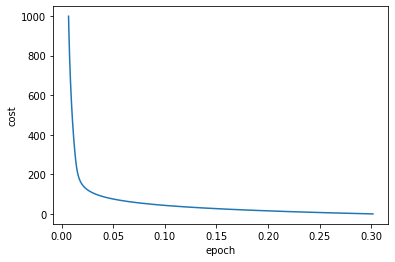

In [83]:
import matplotlib.pyplot as plt
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(model_GD[2],model_GD[-1])

# SGD

In [99]:
# create random Number int
import random

single_int = random.randint(10,20)
print(single_int)

15


In [106]:
single_float = 20 * random.random()
print(single_float)

12.888296392921003


In [107]:
# random list of sample -  int
random.sample(range(10,50),5)

[42, 40, 28, 19, 46]

In [109]:
# random list of sample -  float
float_sample = []
for i in range(10):
    val = random.uniform(10,20)
    float_sample.append(val)
    

In [110]:
float_sample

[18.16455916214821,
 18.02346884534856,
 14.376939101475783,
 13.803403125478416,
 11.343177711806117,
 14.539303115882909,
 15.017175226195818,
 14.683620360932952,
 12.68524688235485,
 13.442286876144452]

In [117]:
# Formaula - Linear regression --> Y = WX + B
import random # get random one sample for epoch

def SGD_gradient_descent(X,y, epochs,lr):
    # Initializse weight , Giving first weight as One
    number_of_features = X.shape[1]
    W = np.ones(shape=(number_of_features))
    B = 0
    Total_samples = X.shape[0]
    
    cost_info = []
    epoch_info = []
    
    for i in range(epochs):
        
        #print('Weight shape ', W.shape)
        #print('Input shape ', X.T.shape)
        
        random_index = np.random.randint(0, Total_samples-1)
        sample_X = X[random_index]
        sample_y = y[random_index]
        
        
        y_pred = np.dot(W , sample_X.T) + B
        cost_function = np.mean(np.square(sample_y  - y_pred))
        
        # Update the weight
        # Formula --> Wnew - Wold - lr * dl/dw
        # dl/dw = -2/n(np.sum(xi*(ypred- y_true))
        
        # -2 becoz we using square in our loss, 
        # w_grad is Derivative with respect to W
        w_grad = -(2/Total_samples) * (sample_X.T.dot(sample_y - y_pred))
        b_grad = -(2/Total_samples) * (np.sum(sample_y  - y_pred))
        
        W = W - (lr * w_grad)
        B = B - (lr * b_grad)
        
        cost_info.append(cost_function)
        epoch_info.append(i)
        
        if i%10 == 0:
            print(f'Epoch: {i}, Weight: {W}, Bias: {B}, Loss:{cost_function}')

    print(f'Final Output W:{W} B:{B}, Loss:{cost_function}')
    return W, B, cost_info, epoch_info
    

In [118]:
model_SGD = SGD_gradient_descent(X_train,y_train,epochs=1000,lr=0.01)

Epoch: 0, Weight: [0.99997633 0.99991421], Bias: -0.00034315134099616857, Loss:0.07536181940957999
Epoch: 10, Weight: [0.9944332  0.99374571], Bias: -0.00826377729474283, Loss:0.21338592726548203
Epoch: 20, Weight: [0.99110634 0.98961892], Bias: -0.014407515633458014, Loss:0.20481669268107486
Epoch: 30, Weight: [0.98692502 0.9849865 ], Bias: -0.020790109510547574, Loss:0.9114550335579196
Epoch: 40, Weight: [0.98404353 0.98149856], Bias: -0.026681558138900704, Loss:0.05877576514682558
Epoch: 50, Weight: [0.98256343 0.97921136], Bias: -0.03105918993358669, Loss:0.43954060252589416
Epoch: 60, Weight: [0.97883823 0.97514859], Bias: -0.037026989733371714, Loss:0.17507808624634835
Epoch: 70, Weight: [0.97605177 0.97187502], Bias: -0.04248874883152188, Loss:0.3471953758575409
Epoch: 80, Weight: [0.97313162 0.96816989], Bias: -0.04836146379871784, Loss:0.31868933902887314
Epoch: 90, Weight: [0.96903204 0.96399311], Bias: -0.05435177311938924, Loss:0.04844962451477333
Epoch: 100, Weight: [0.966

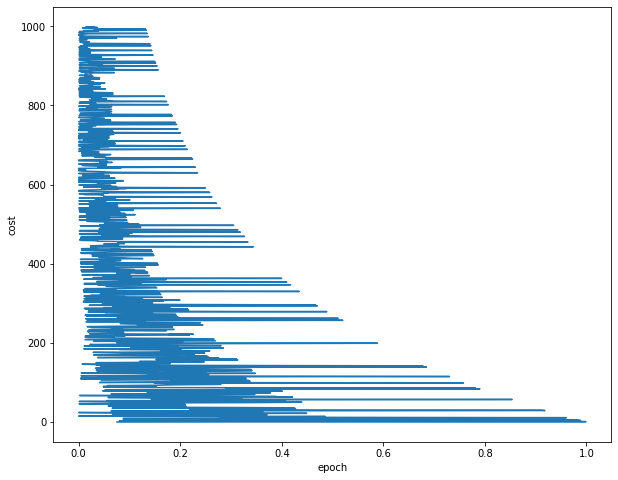

In [122]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(model_SGD[2],model_SGD[-1])

# MINI BATCH SGD

In [126]:
# Formaula - Linear regression --> Y = WX + B
import random # get random one sample for epoch

def miniBatch_gradient_descent(X,y, epochs,lr):
    # Initializse weight , Giving first weight as One
    number_of_features = X.shape[1]
    W = np.ones(shape=(number_of_features))
    B = 0
    Total_samples = X.shape[0]
    
    cost_info = []
    epoch_info = []
    
    for i in range(epochs):
        
        #print('Weight shape ', W.shape)
        #print('Input shape ', X.T.shape)
        
        random_index = random.sample(range(0,Total_samples-1), 5)
        sample_X = X[random_index]
        sample_y = y[random_index]
        
        
        y_pred = np.dot(W , sample_X.T) + B
        cost_function = np.mean(np.square(sample_y  - y_pred))
        
        # Update the weight
        # Formula --> Wnew - Wold - lr * dl/dw
        # dl/dw = 1/n np.sum(xi*(ypred- y_true))
        
        w_grad = -(2/Total_samples) * (sample_X.T.dot(sample_y - y_pred))
        b_grad = -(2/Total_samples) * (np.sum(sample_y  - y_pred))
        
        W = W - (lr * w_grad)
        B = B - (lr * b_grad)
        
        cost_info.append(cost_function)
        epoch_info.append(i)
        
        if i%10 == 0:
            print(f'Epoch: {i}, Weight: {W}, Bias: {B}, Loss:{cost_function}')

    print(f'Final Output W:{W} B:{B}, Loss:{cost_function}')
    return W, B, cost_info, epoch_info
    

In [127]:
model_MiniGD = miniBatch_gradient_descent(X_train,y_train,epochs=1000,lr=0.01)

Epoch: 0, Weight: [0.99741021 0.99693486], Bias: -0.004075446998722861, Loss:0.46172426287211155
Epoch: 10, Weight: [0.98337044 0.98005639], Bias: -0.032418101420137534, Loss:0.2733994840910016
Epoch: 20, Weight: [0.96927111 0.96244866], Bias: -0.06017294940628789, Loss:0.16786565184856211
Epoch: 30, Weight: [0.95502015 0.94588518], Bias: -0.08625494721647753, Loss:0.24175932751322873
Epoch: 40, Weight: [0.94423562 0.93298848], Bias: -0.10762496572553798, Loss:0.11941176083139571
Epoch: 50, Weight: [0.92929059 0.91674109], Bias: -0.13122418999631946, Loss:0.13050778707557642
Epoch: 60, Weight: [0.9213015  0.90679665], Bias: -0.14735571703342573, Loss:0.06833053553785728
Epoch: 70, Weight: [0.9150026  0.89775032], Bias: -0.16272022507740844, Loss:0.07504095986172124
Epoch: 80, Weight: [0.90561975 0.88661515], Bias: -0.17826041066749929, Loss:0.05607957435476742
Epoch: 90, Weight: [0.89679066 0.87622264], Bias: -0.19290329072097118, Loss:0.055866100747797465
Epoch: 100, Weight: [0.891352

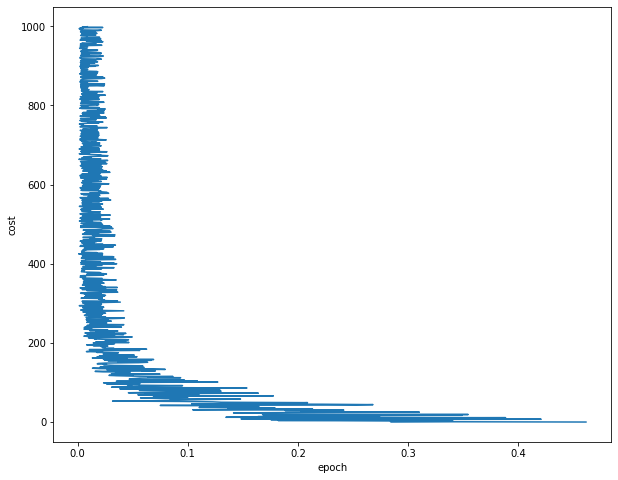

In [128]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(model_MiniGD[2],model_MiniGD[-1])

In [139]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report


In [136]:
## Precision , recall and F1score

Truth     = ['D','C','D','D','D','C','C','D','D']
Predicted = ['D','D','D','C','D','C','D','C','D']

encode_Truth = [0 if i == 'D' else 1 for i in Truth ]
encode_predicted = [0 if i == 'D' else 1 for i in Predicted ]

# confusion_matrix(Truth,Predicted)

In [138]:
confusion_matrix(encode_Truth, encode_predicted )

array([[4, 2],
       [2, 1]], dtype=int64)

In [141]:
print(classification_report(encode_Truth, encode_predicted ))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.33      0.33      0.33         3

    accuracy                           0.56         9
   macro avg       0.50      0.50      0.50         9
weighted avg       0.56      0.56      0.56         9



In [143]:
## Precision , recall and F1score -  Example

Truth     = ['D','C','D','D','D','C','C','D','D']
Predicted = ['D','C','D','D','D','C','D','D','D']

encode_Truth = [0 if i == 'D' else 1 for i in Truth ]
encode_predicted = [0 if i == 'D' else 1 for i in Predicted ]

print(classification_report(encode_Truth, encode_predicted ))


              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.67      0.80         3

    accuracy                           0.89         9
   macro avg       0.93      0.83      0.86         9
weighted avg       0.90      0.89      0.88         9

